* This notebook was made to look at 1.5 m salinity comparison between reduced viscosity, no_banks, new bathymetry, nowcast model result and ferry salinity in the hindcast.

In [1]:
import sys
sys.path.append('/ocean/jieliu/research/meopar/salinity_comparison/salinity.py')
import salinity
import datetime
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import matplotlib.gridspec as gridspec
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
paths = {'nowcast': '/data/jieliu/MEOPAR/river-treatment/oct8_10nowcast/',
        'deepenresult': '/data/jieliu/MEOPAR/river-treatment/oct8_10RFdailySmoo/',
        'reduced_viscosity': '/data/jieliu/MEOPAR/river-treatment/oct8_10reduceviscosity/',
        'no_banks': '/data/jieliu/MEOPAR/river-treatment/oct8_10nobanks/',
        'all_reduced': '/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/',
        'jetty': '/data/jieliu/MEOPAR/river-treatment/oct8_10jetty1e0605/'}

In [3]:
def salinity_plot_test(run_date, saline, run_lower, run_upper, path_ssh,t):
    """This function was made to plot ferry 1.5m/average 3m salinity with different cases vs ferry salinity
        and there differences. should consider set up value_mean_4rd as {}"""
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_deep, value_mean_4rd_deep, \
    value_mean_avedeep, value_mean_ave4deep,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['deepenresult'],run_lower,run_upper)
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_nowcast, value_mean_4rd_nowcast, \
    value_mean_ave3nowcast, value_mean_ave4nowcast,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['nowcast'],run_lower,run_upper)
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_redu, value_mean_4rd_redu, \
    value_mean_averedu, value_mean_ave4redu,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['reduced_viscosity'],run_lower,run_upper)
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_nobank, value_mean_4rd_nobank, \
    value_mean_avenobank, value_mean_ave4nobank,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['no_banks'],run_lower,run_upper)
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_allredu, value_mean_4rd_allredu, \
    value_mean_aveallredu, value_mean_ave4allredu,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['all_reduced'],run_lower,run_upper)
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_jetty, value_mean_4rd_jetty, \
    value_mean_avejetty, value_mean_ave4jetty,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['jetty'],run_lower,run_upper)
    
    #fig, axs = plt.subplots(2, 2, figsize=(18, 16))
    fig = plt.figure(figsize=(18,18))
    gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1])
    gs.update(wspace=0.17, hspace=0.3)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    axx = [ax0, ax1]
    axy = [ fig.add_subplot(gs[1, 0]),fig.add_subplot(gs[1, 1])]
    ax3 = fig.add_subplot(gs[2, 0])
    titles = ['1.5 m Salinity ', 'Average 3 m salinity ', 'Residuals of 1.5 m salinity ',\
              'Residuals of average 3 m salinity '];
    nowcast = [value_mean_3rd_nowcast, value_mean_ave3nowcast];
    deep = [value_mean_3rd_deep, value_mean_avedeep];
    redu = [value_mean_3rd_redu, value_mean_averedu];
    nobank = [value_mean_3rd_nobank, value_mean_avenobank];
    allredu = [value_mean_3rd_allredu, value_mean_aveallredu];
    jetty = [value_mean_3rd_jetty,value_mean_avejetty]

    ## 1.5m salinity comparison
    model_3rd_nowcast=ax0.plot(lon_model,value_mean_3rd_nowcast,'DodgerBlue',\
                                        linewidth=2, label='nowcast')
    model_3rd_deep=ax0.plot(lon_model,value_mean_3rd_deep,'MediumBlue',\
                                            linewidth=2, label="deepened" )
    model_3rd_redu=ax0.plot(lon_model,value_mean_3rd_redu,'tomato',\
                                            linewidth=2, label="reduced_viscosity" )
    model_3rd_nobank=ax0.plot(lon_model,value_mean_3rd_nobank,'DeepPink',\
                                            linewidth=2, label="no_banks" )
    model_3rd_allredu=ax0.plot(lon_model,value_mean_3rd_allredu,'Indigo',\
                                            linewidth=2, label="all_redu" )
    model_3rd_allredu=ax0.plot(lon_model,value_mean_3rd_jetty,'Olive',\
                                            linewidth=2, label="jetty" )

    observation_salinity=ax0.plot(lon1_model,salinity1_2_4,'DarkGreen', \
                                         linewidth=2, label="Observed")

    ## average 3m salinity comparison
    model_3rd_avenowcast=ax1.plot(lon_model,value_mean_ave3nowcast,'DodgerBlue',\
                                        linewidth=2, label='nowcast')
    model_3rd_avedeep=ax1.plot(lon_model,value_mean_avedeep,'MediumBlue',\
                                            linewidth=2, label="deepened" )
    model_3rd_averedu=ax1.plot(lon_model,value_mean_averedu,'tomato',\
                                            linewidth=2, label="reduced_viscosity" )
    model_3rd_nobank=ax1.plot(lon_model,value_mean_avenobank,'DeepPink',\
                                            linewidth=2, label="no_banks" )
    model_3rd_nobank=ax1.plot(lon_model,value_mean_aveallredu,'Indigo',\
                                            linewidth=2, label="all_redu" )
    model_3rd_allredu=ax1.plot(lon_model,value_mean_avejetty,'Olive',\
                                            linewidth=2, label="jetty" )

    observation_salinity=ax1.plot(lon1_model,salinity1_2_4,'DarkGreen', \
                                         linewidth=2, label="Observed")

    for ax,title in zip(axx, titles[:2]):
        ax.set_xlim(-124, -123)
        ax.set_ylim(0, 30)
        ax.set_xlabel('Longitude', fontsize = 16)
        ax.set_ylabel('Practical Salinity', fontsize = 16)
        ax.legend(loc = 3,fontsize = 16)
        ax.set_title(title + date_str, fontsize = 16)
        plt.setp(ax.get_xticklabels(), fontsize=16)
        plt.setp(ax.get_yticklabels(), fontsize=16)

    for ax, value_nowcast, value_deep, value_redu, value_nobank,value_allredu, value_jetty,title\
    in zip(axy, nowcast, deep, redu, nobank, allredu, jetty,titles):
        diff_nowcast = ax.plot(lon_model, salinity11 - value_nowcast,'DodgerBlue',\
                                        marker = '*', markersize = 8, linewidth=2, label='nowcast' )
        diff_deep = ax.plot(lon_model, salinity11 - value_deep, 'MediumBlue',\
                                        marker = '^', markersize = 8,linewidth=2, label="deepened")
        diff_redu = ax.plot(lon_model, salinity11 - value_redu, 'tomato',\
                                        marker = 'o',markersize = 8, linewidth=2, label="reduced_viscosity")
        diff_nobank = ax.plot(lon_model, salinity11 - value_nobank, 'DeepPink',\
                                        marker = 'o',markersize = 8, linewidth=2, label="no_banks")
        diff_allredu = ax.plot(lon_model, salinity11 - value_allredu, 'Indigo',\
                                        marker = 'o',markersize = 8, linewidth=2, label="all_redu")
        diff_jetty = ax.plot(lon_model, salinity11 - value_jetty, 'Olive',\
                                        marker = 'o',markersize = 8, linewidth=2, label="jetty")
        ax.set_xlim(-124, -123)
        ax.set_ylim(-10, 10)
        ax.set_xlabel('Longitude', fontsize = 16)
        ax.set_ylabel('Practical Salinity', fontsize = 16)
        ax.legend(loc = 3,fontsize = 16)
        ax.set_title(title + date_str, fontsize = 16)
        plt.setp(ax.get_xticklabels(), fontsize=16)
        plt.setp(ax.get_yticklabels(), fontsize=16)
    ## add ssh plot
    ssh,tt, hour = salinity.get_ssh_in_model(run_date, path_ssh,t)
    ax3.plot(tt[:],ssh[:, 466,329],'-k', linewidth = 2.5)
    ax3.plot(tt[t],ssh[t, 466,329], color = 'Maroon',marker='*', markersize = 16)
       
    ax3.set_title('Modelled water level at Point Atkinson on '\
                                       + hour.strftime('%d-%b-%Y %H:%M'), fontsize=16)
    ax3.set_xlabel('time',  fontsize=16)
    ax3.set_ylabel('Water level (m)')
    plt.setp(ax3.get_xticklabels(), fontsize=16)
    plt.setp(ax3.get_yticklabels(), fontsize=16)
    return fig 

* For October 8

In [4]:
run_date = datetime.datetime(2014,10,8)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141008.mat')

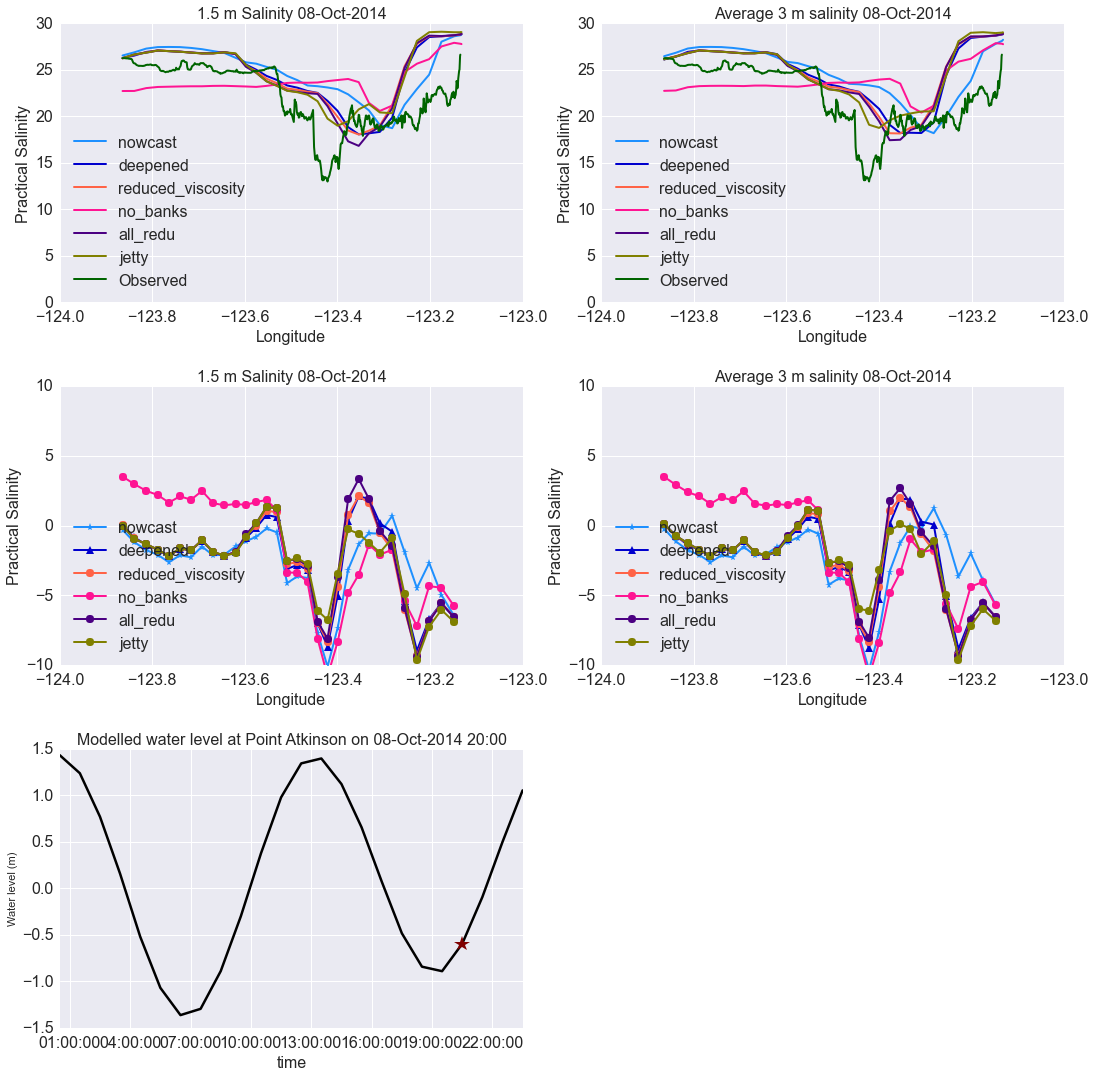

In [5]:
fig = salinity_plot_test(run_date,saline, 20,22,paths['deepenresult'], 20)

In [6]:
run_date = datetime.datetime(2014,10,8)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141007.mat')

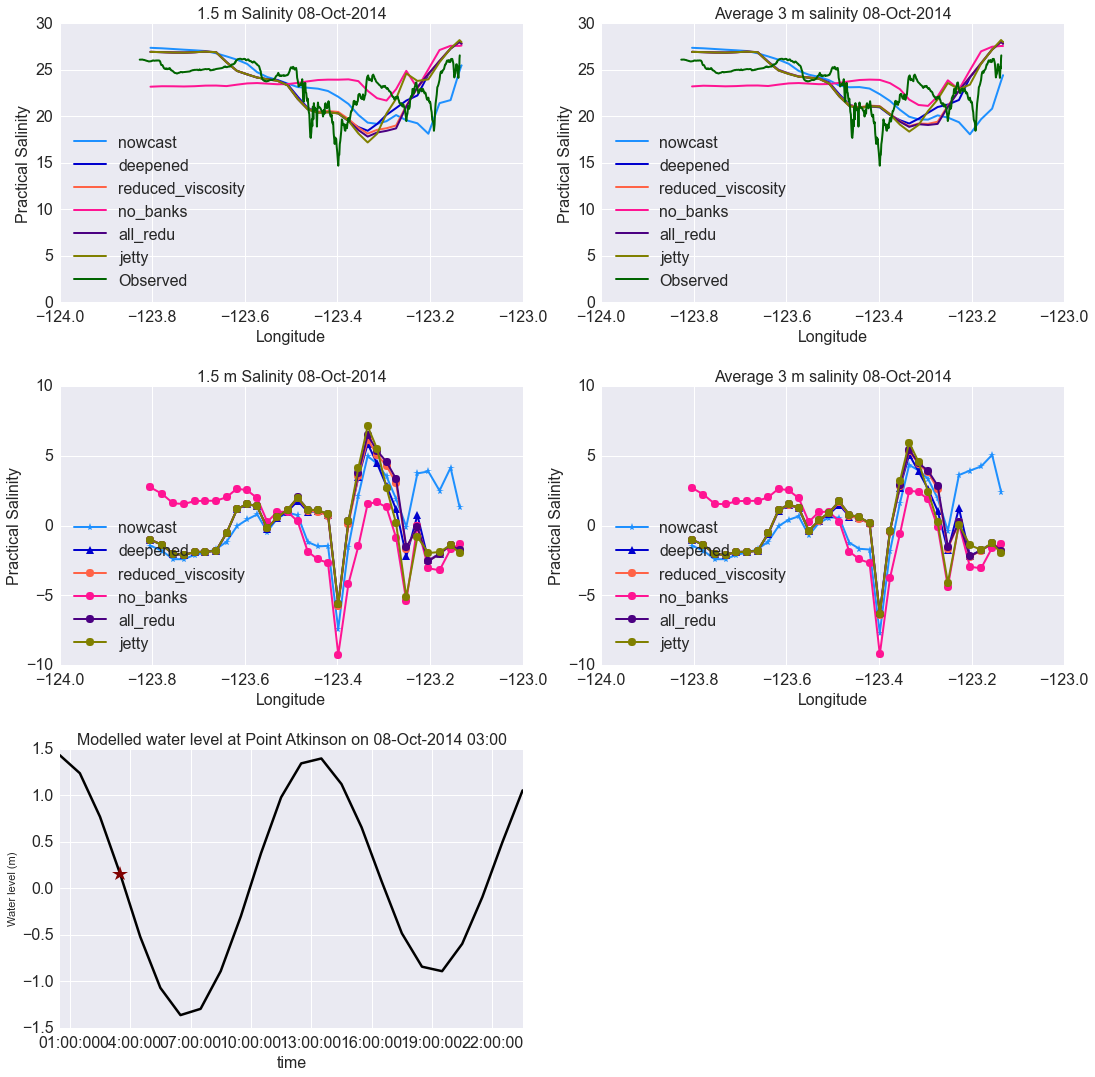

In [7]:
fig = salinity_plot_test(run_date,saline, 3,5,paths['deepenresult'],3)

* For October 9

In [8]:
run_date = datetime.datetime(2014,10,9)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141009.mat')

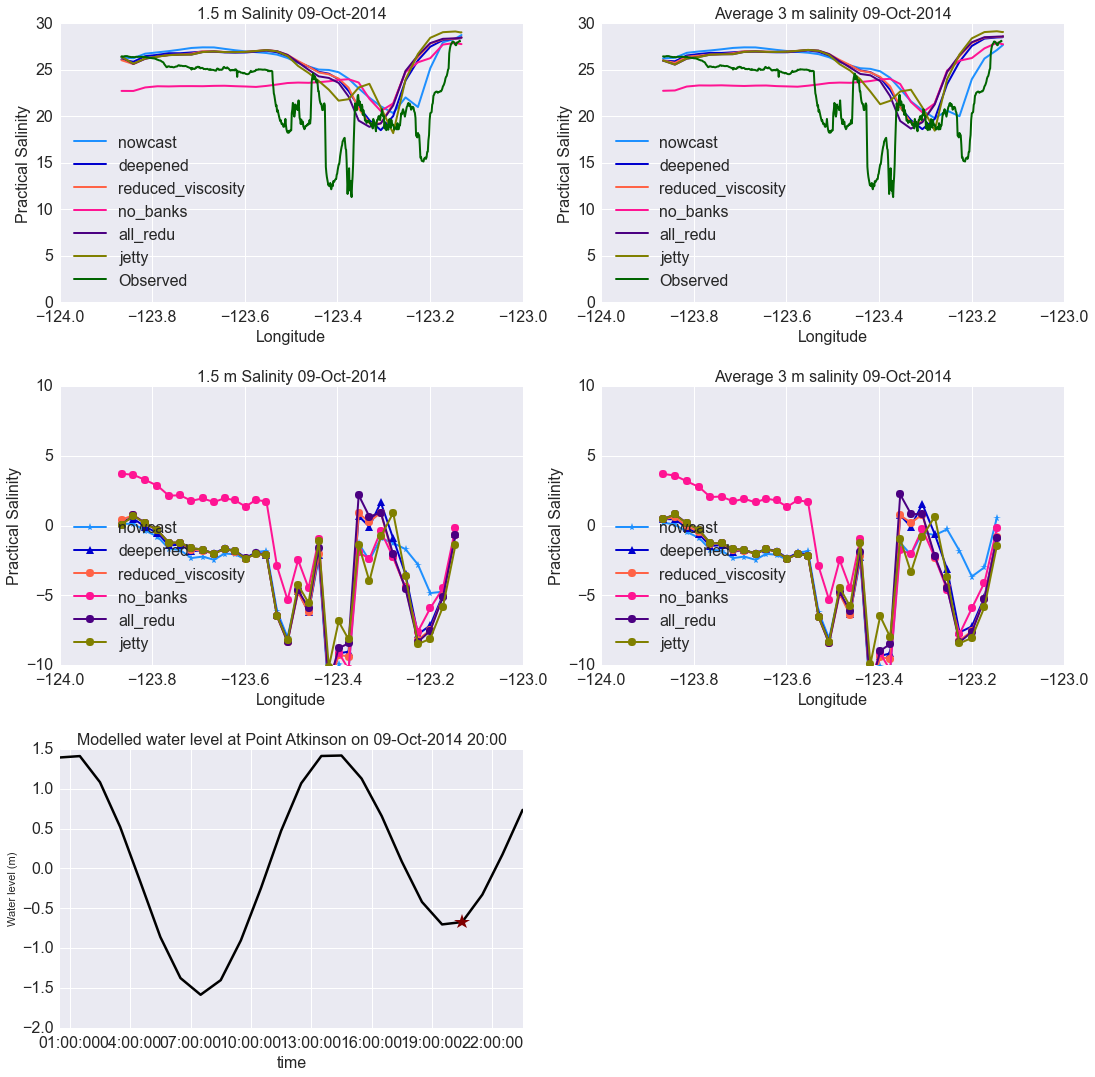

In [9]:
fig = salinity_plot_test(run_date,saline, 20,22,paths['deepenresult'], 20)

In [10]:
run_date = datetime.datetime(2014,10,9)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141008.mat')

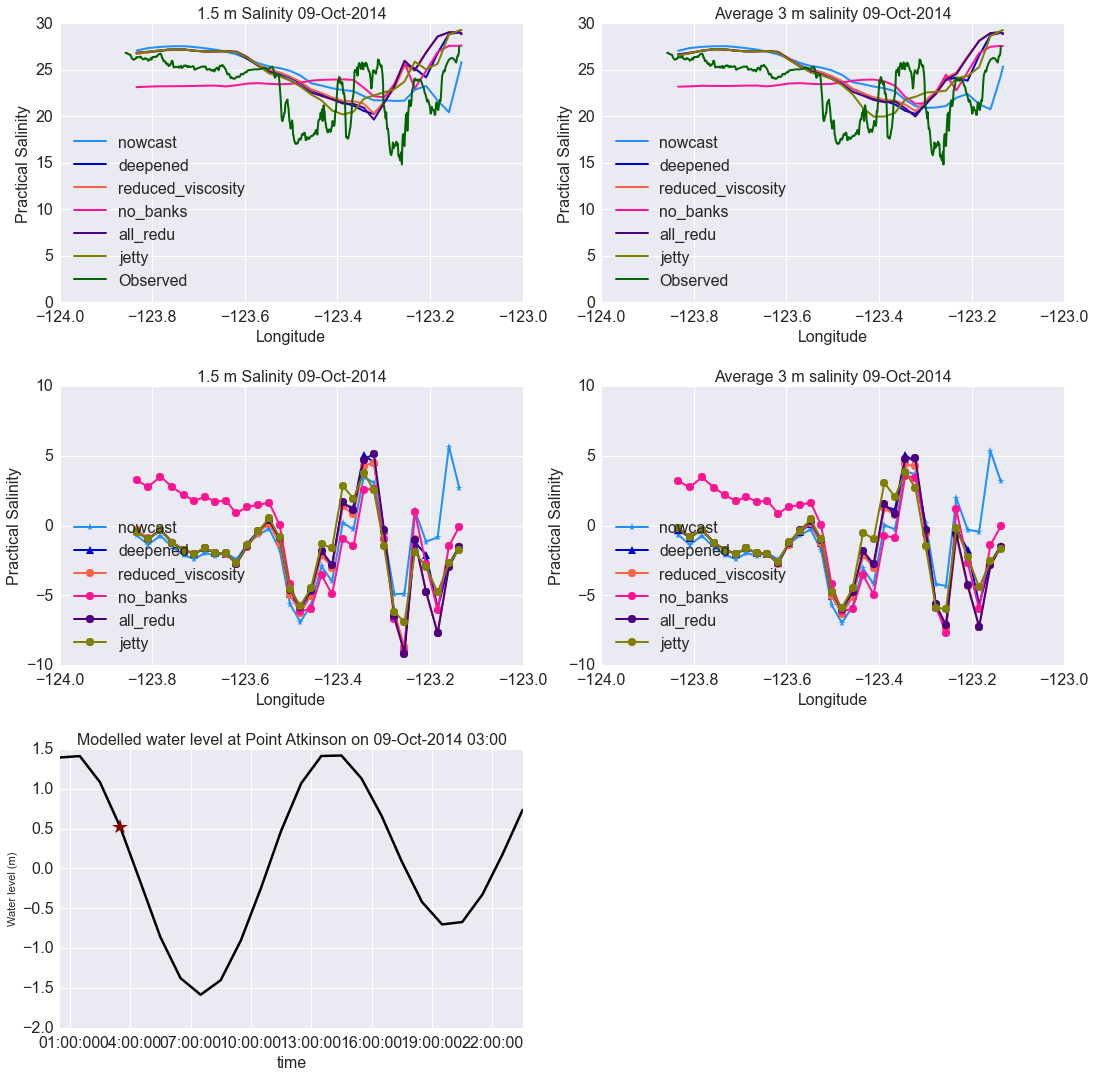

In [11]:
fig = salinity_plot_test(run_date,saline,3,5,paths['deepenresult'],3)

* For October 10

In [12]:
run_date = datetime.datetime(2014,10,10)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141009.mat')

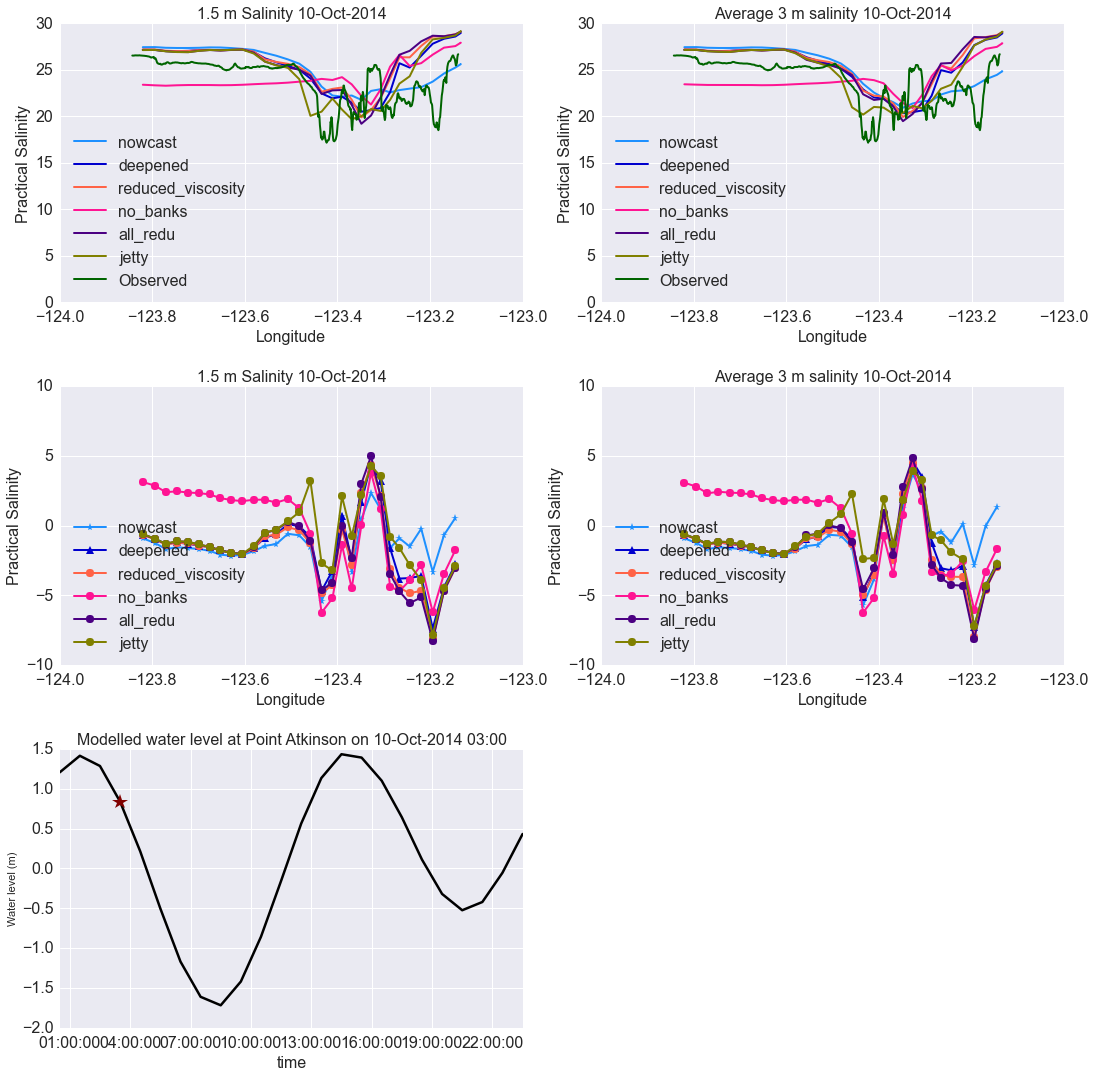

In [13]:
fig = salinity_plot_test(run_date,saline,3,5,paths['deepenresult'],3)

In [14]:
run_date = datetime.datetime(2014,10,10)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141010.mat')

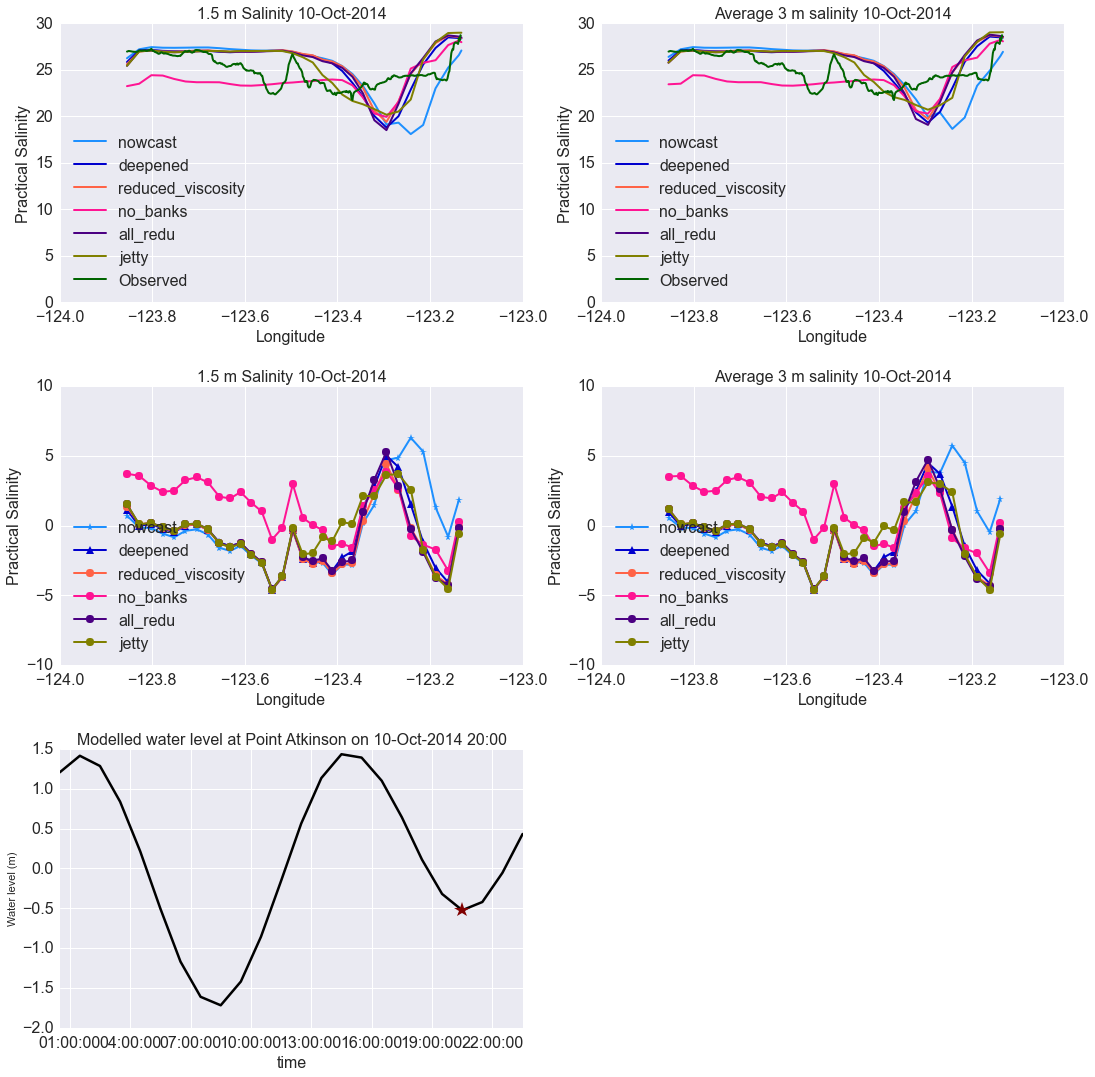

In [15]:
fig = salinity_plot_test(run_date,saline, 20,22,paths['deepenresult'], 20)

* Small difference between reduced viscosity/diffusivity with only reduced viscosity.
* Location of minimum salinity values for new river treatment moves half way towards that for observation.
* Jetty one looks the best within these comparisons.